# Problem 1

The task is to optimize your solutions by using "line_profiler". 

Your submission "spring2021_sol04_yourid.ipynb" will contain:
- the first part is your original solution (a solution that you originally wrote); 
- the second part is your final, optimized solution after using line_profiler; 
- both of which will include the line_profiler results, and your detailed comments.


The problem is to simulate a random motion of $n$ objects over a discrete time. 

Concretely, there is:
- a unit square $[0,1]^2$, 
- $n$ points within the unit square, 
- and the time is discrete $t=0, 1, 2, \dots$. 

At time $t=0$, the positions of $n$ points are randomly and uniformly distributed within the unit square; call these positions $\{p_0, p_1, p_2,\dots, p_{n-1}\}$. 

At every time step $t \geq 0$, every point $i$, chooses to randomly move in one of four directions: left, right, up, down. The distance is also random uniform number on $[0, \delta]$, where $\delta$ is given. 

That is, at every time step $t$ and for every $i$ we generate a random move as: 
$$ p_i := p_i + r_i \cdot u_i$$
where 
$$ r_i \sim uniform[0, \delta],$$ 
and 
$u_i$ represents a random direction, i.e. a randomly chosen vector among $(-1, 0), (1, 0), (0, -1), (0, 1)$.

**Dynamics**

Now, one would like to examine and plot the diagram of the minimum distance $d_{\min}$ among these $n$ points over $T$ iterations.

The task is to complete the rest of this notebook, where definitions of the functions main_orignal and main_optimized are given below. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
%load_ext line_profiler

---

### The original code description: 

We create an array of arrays - dirs, including all the directions movements could occur.
We choose a random element from this array to determine movement in each iteration.
The function my_func describes the function that results in the output position of a point
after the movement occurs. We use the numpy apply along axis function to move the random points
of (n, 2) matrix in each iteration, clip the points so that they remain in the defined space,
record minimum distance and store it.

---


In [3]:
def main_original(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    
    dirs = np.array([(-1, 0), (1, 0), (0, -1), (0, 1)])
    
    my_func = lambda x: np.add(x, np.multiply(np.random.uniform(0, delta, 1), dirs[np.random.choice(4)]))
    
    points = np.random.rand(n, 2)
    
    min_ds = np.empty(T)
    
    for i in range(T):
        points_ = np.apply_along_axis(my_func, axis=1, arr=points)
        points_ = np.clip(0, 1, points_)
        min_d = np.min(np.linalg.norm(points_-points, axis=1))
        min_ds[i] = min_d
        points = points_
    
    return list(min_ds)

In [4]:
n = 1500
delta = 1.0 / n
T = 20

In [5]:
%lprun -f main_original lst_min_dist = main_original(n, delta, T)

Timer unit: 1e-06 s

Total time: 0.448048 s
File: <ipython-input-3-0e00d8b8fcb6>
Function: main_original at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def main_original(n, delta, T): 
     2                                               """ 
     3                                               n: is the number of uniformly at random generated points in the unit square 
     4                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     5                                               T: number of iterations
     6                                               return: 
     7                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
     8                                               it is a list of reals of length T"""
     9              

len: 20


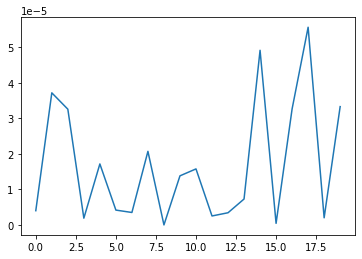

In [6]:
# plot the diagram of the minimum distances:
# where we rescale distance with by factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()

---

### The optimized code description: 

The original solution remains the most optimized solution. As per the previous line-profiler results, the bottleneck occurs in using the numpy apply along axis function. In improving this function, we tried writing the solution in Cython, using a defined loop. This actually takes longer to evaluate. We tried with both lambda function and a completely pre-defined function on top of main_optimized using cdef. The later added further overhead. We also tried keeping a mix of variables in the memoryview. That also did not result in any reduction in time taken by main_original. Among all the cython versions we tried, the most optimized one has been screenshotted below for T=20 iterations, and all else constant.

---


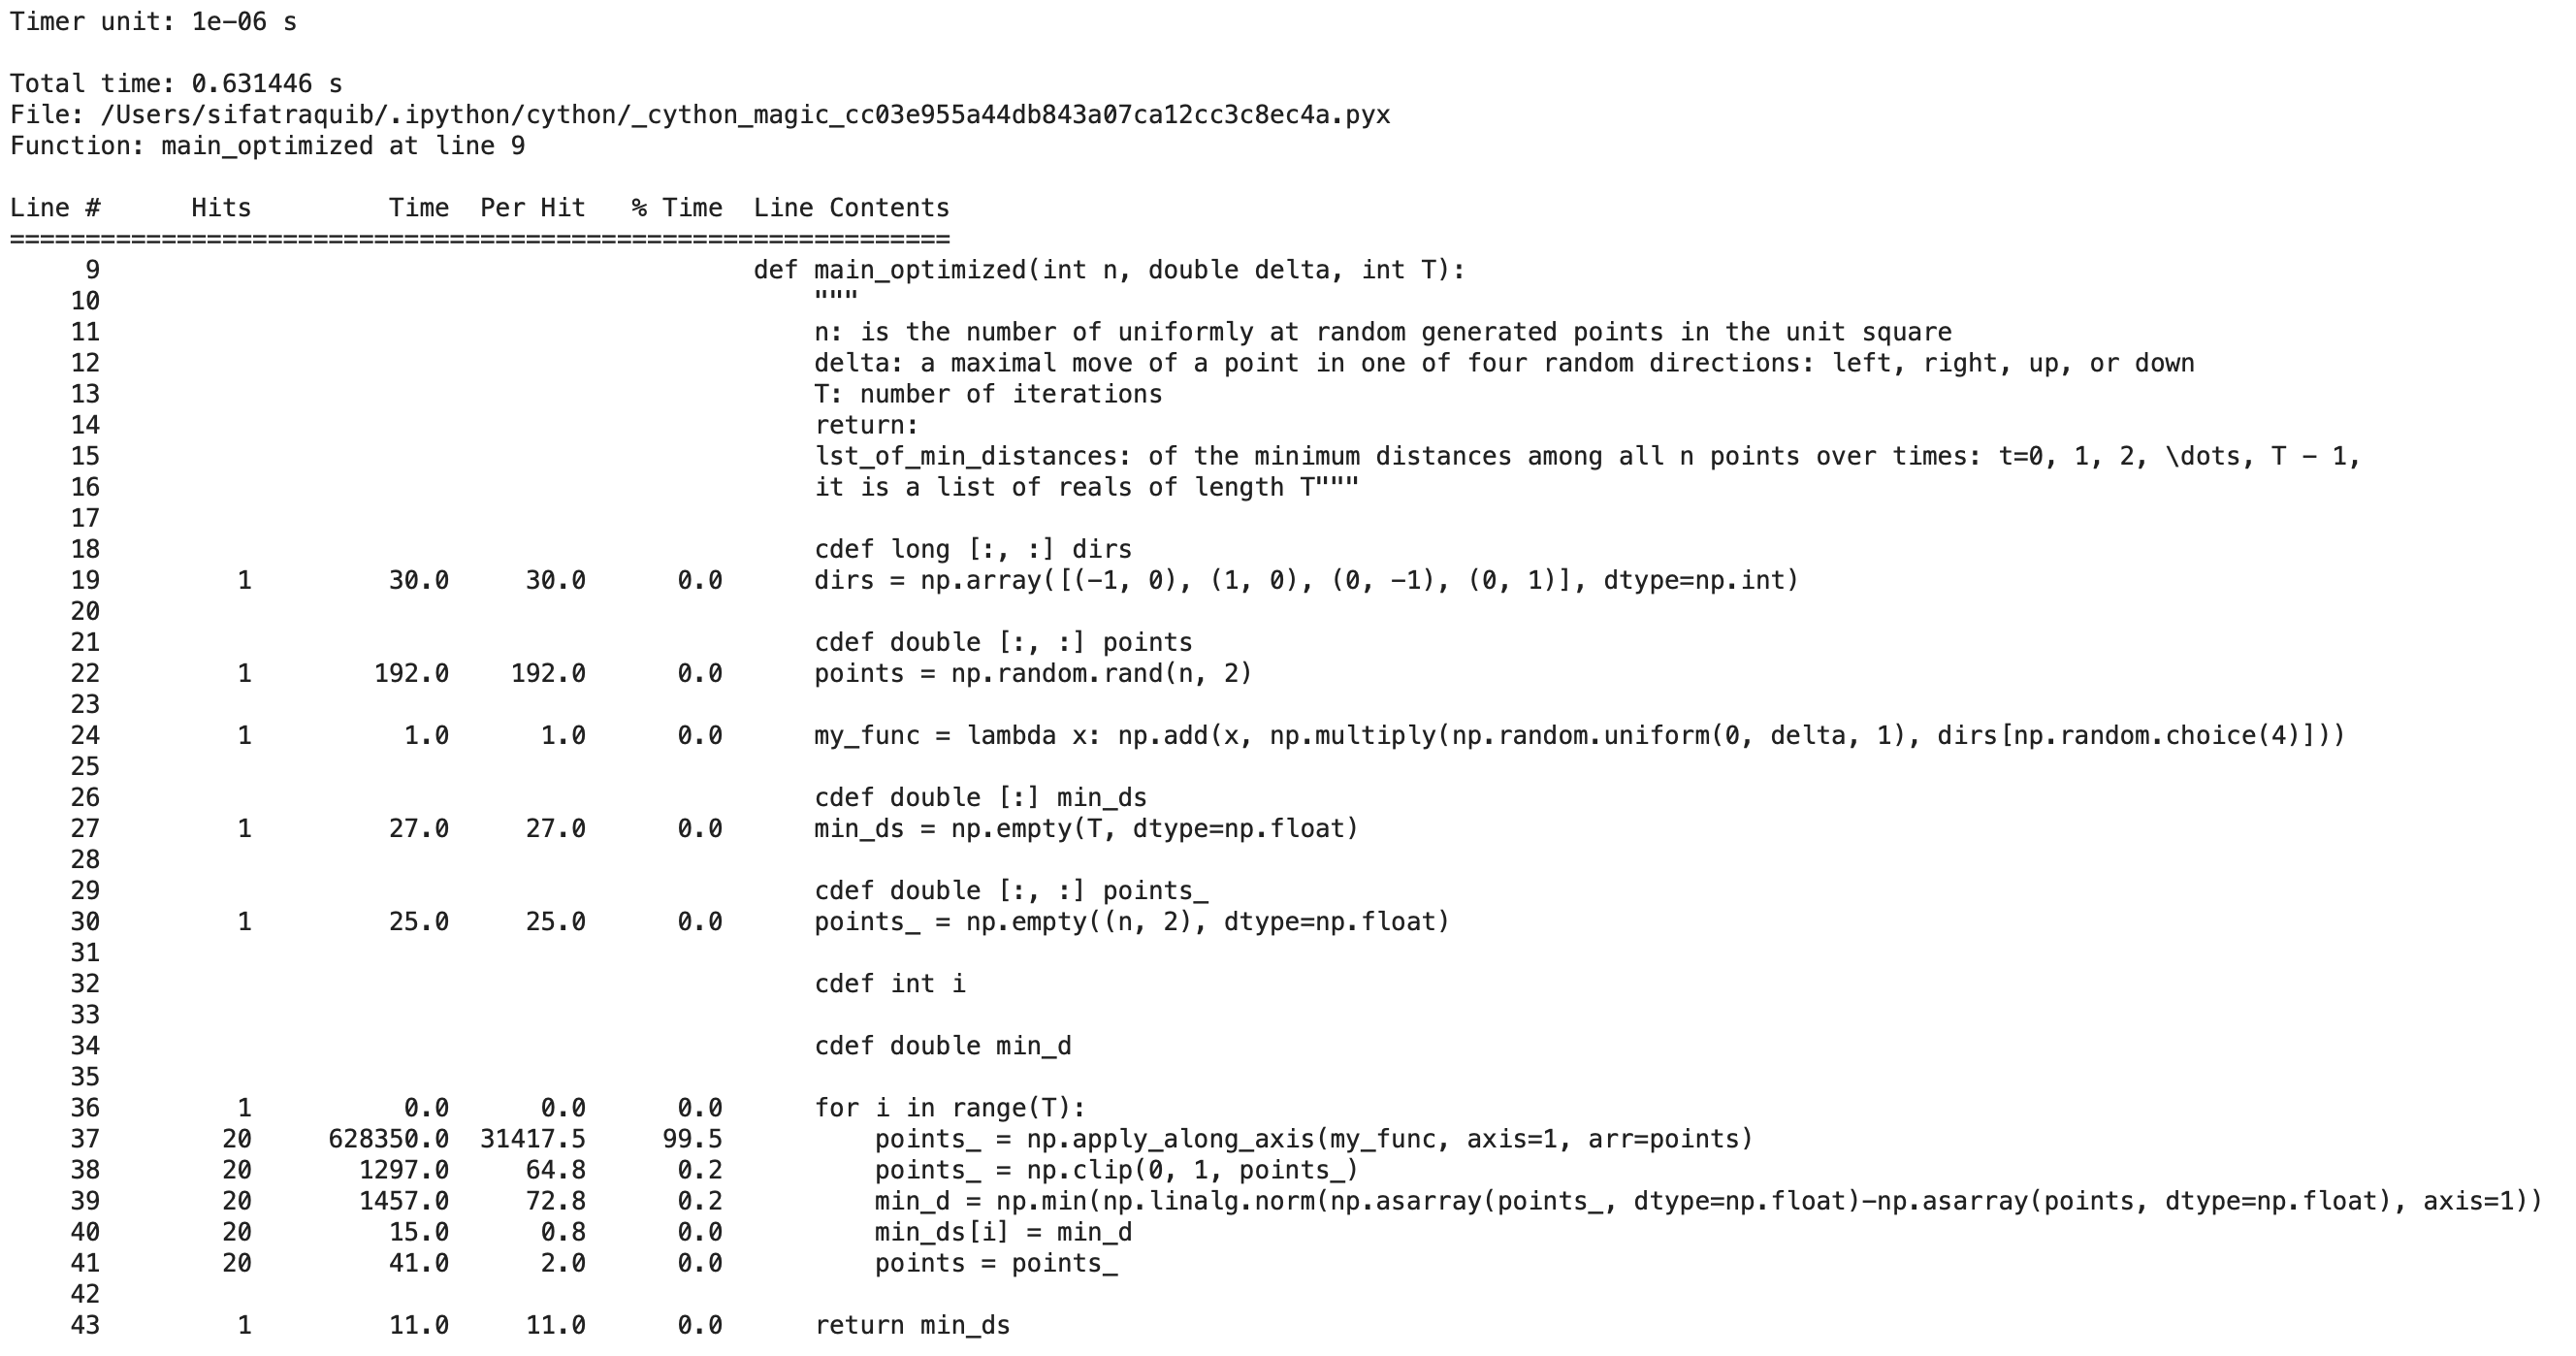

In [7]:
from IPython.display import Image
Image(filename="Screen Shot 2021-03-08 at 2.23.42 PM.png")

In [8]:
def main_optimized(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    
    dirs = np.array([(-1, 0), (1, 0), (0, -1), (0, 1)])
    
    my_func = lambda x: np.add(x, np.multiply(np.random.uniform(0, delta, 1), dirs[np.random.choice(4)]))
    
    points = np.random.rand(n, 2)
    
    min_ds = np.empty(T)
    
    for i in range(T):
        points_ = np.apply_along_axis(my_func, axis=1, arr=points)
        points_ = np.clip(0, 1, points_)
        min_d = np.min(np.linalg.norm(points_-points, axis=1))
        min_ds[i] = min_d
        points = points_
    
    return list(min_ds)

In [9]:
n = 1500
delta = 1.0 / n
T = 40

In [10]:
%lprun -f main_optimized lst_min_dist = main_optimized(n, delta, T)

Timer unit: 1e-06 s

Total time: 0.826176 s
File: <ipython-input-8-897210013239>
Function: main_optimized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def main_optimized(n, delta, T): 
     2                                               """ 
     3                                               n: is the number of uniformly at random generated points in the unit square 
     4                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     5                                               T: number of iterations
     6                                               return: 
     7                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
     8                                               it is a list of reals of length T"""
     9            

len: 40


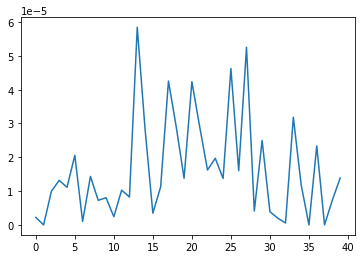

In [11]:
# plot the diagram of the minimum distances:
# where we rescale distance by a factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()